In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import csv
%matplotlib inline

## Aufgabe 1

Perzeptronklassifikator $f(x): R² \rightarrow \{0,1\}$ mit Parametern $w_0 = 2, w_1 = -0.4$ und $w_2 = 0.5$

### 1) Welches geometrische Objekt ist die Entscheidungsoberfläche?

Eine Gerade

### 2) Zeichnen Sie die Entscheidungsoberfläche und markieren Sie den Halbraum welcher positiv klassifiziert und welcher Halbraum negativ ist

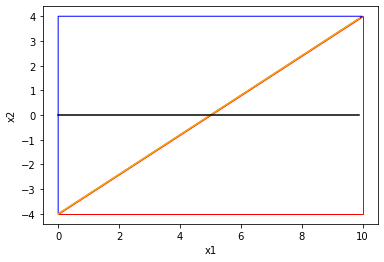

In [2]:
f = lambda x: -4 + 0.8 * x 
x_1 = np.arange(0.0, 10.0, 0.1)
x_2 = [f(x_i) for x_i in x_1]
ply = plt.Polygon([[0.0, -4.0], [10.0, 4.0], [0.0, 4.0]], fill=False, closed=True, color='b')
plt.gca().add_line(ply)
ply = plt.Polygon([[0.0, -4.0], [10.0, -4.0], [10.0, 4.0]], fill=False, closed=True, color='r')
plt.gca().add_line(ply)
plt.plot(x_1, x_2, c="orange")
plt.plot(x_1, [0 for x_i in x_1], c="black")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 3) Was müssten Sie an $f(x)$ ändern um eine entgegengesetzte Klassifikation zu erhalten?

Vorzeichen der Gewichte $w_i$ umdrehen zu:

$f(x) = -2 + 0.4x_1 - 0.5x_2$

### 4) Berechnen Sie die Gewichte eines Perzeptronklassifikators, wenn Sie wissen, dass
- die Punkte (3,0) und (0,3) auf der Entscheidungsoberfläche liegen und dass
- der Ursprung (0,0) negativ klassifiziert wird

$w_0 + 3x_1 = 0 \Rightarrow w_0 = -3x_1$

$w_0 + 3x_2 = 0 \Rightarrow w_0 = -3x_2$

$w_0 < 0 \Rightarrow x_1 = x_2 = 1 \Rightarrow w_0 = -3$

$f(x_1, x_2) = -3 + x_1 + x_2$

## Aufgabe 2

$f(x): R² \rightarrow \{0, 1\} = \alpha(w_1x_1 + w_2x_2 + w_0)$

- $d¹ = [1,2]$ (Klasse 1)
- $d² = [2,3]$ (Klasse 0)
- $d³ = [2,0]$ (Klasse 1)

### 1) Zeichnen Sie die drei Datenpunkte in ein Koordinatensystem

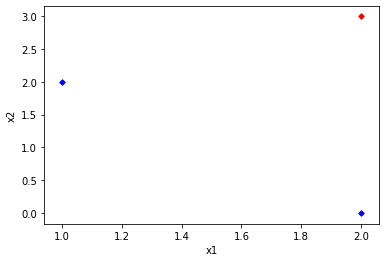

In [3]:
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 2) Angenommen die Gewichte sind anfangs $w = 0$, zeichnen Sie in das Koordinatensystem die Entscheidungsoberfläche ein

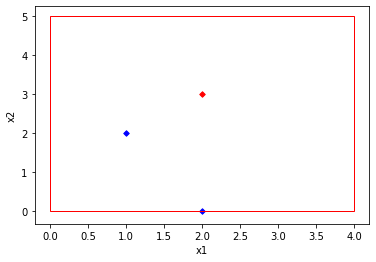

In [4]:
ply = plt.Polygon([[0.0, 0.0], [4.0, 0.0], [4.0, 5.0], [0.0, 5.0]], fill=False, closed=True, color='r')
plt.gca().add_line(ply)
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 3) Führen Sie das Training schrittweise durch bis alle Datenpunkte korrekt klassifiziert werden. Was ist der endgültige Wert von `w`? Wieviele Iterationen wurden benötigt?

In [5]:
alpha = lambda x: 1 if x > 0 else 0

def sum(x, y, w):
    s = 0.0
    for i in range(len(y)):
        nv = np.abs(y[i] - alpha(np.dot(w, x[i])))
        s += nv
    return s

def perceptron_learn(x, y):
    w = np.array([0] * len(y))
    err = lambda: (1.0 / len(y)) * sum(x, y, w)
    iters = 0
    while err() != 0.0:
        _w = w.copy()
        o = np.array([0] * len(y))
        for i in range(len(y)):
            o[i] = alpha(np.dot(w, x[i]))
            _w = _w + (y[i] - o[i]) * x[i]
        iters += 1

        w = _w
    return w, iters


In [6]:
x = np.array([
    [1.0, 1.0, 2.0],
    [1.0, 2.0, 3.0],
    [1.0, 2.0, 0.0]
])
y = np.array([
    1, 0, 1
])

w, iters = perceptron_learn(x, y)
print("W:", w, "\nIterations:", iters)

W: [ 8. -1. -2.] 
Iterations: 29


### 4) Zeichnen Sie nochmals die drei Datenpunkte in ein Koordinatensystem, zeichnen Sie die Entscheidungsoberfläche ebenfalls

$f(x_1, x_2) = 8 -x_1 -2x_2$

$8 - x_1 - 2x_2 = 0$

$\Leftrightarrow x_2 = 4 - 0.5x_1$

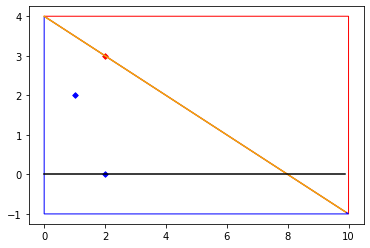

In [7]:
f = lambda x: 4 - 0.5 * x
x_1 = np.arange(0, 10, 0.1)
x_2 = [f(x) for x in x_1]
ply = plt.Polygon([[0.0, 4.0], [10.0, -1.0], [10.0, 4.0]], color='red', closed=True, fill=False)
plt.gca().add_line(ply)
ply = plt.Polygon([[0.0, 4.0], [10.0, -1.0], [0.0, -1.0]], color='blue', closed=True, fill=False)
plt.gca().add_line(ply)
plt.plot(x_1, x_2, color="orange")
plt.scatter(1, 2, marker="D", s=15, color='blue')
plt.scatter(2, 3, marker="D", s=15, color='red')
plt.scatter(2, 0, marker="D", s=15, color='blue')
plt.plot(x_1, [0 for x in x_1], color='black')
plt.show()

## Aufgabe 3 - `ex04_03.ipynb`

### 1) Führen Sie die Zellen bis Implementierung aus

In [8]:
def load_data(filename):
    """
    load a 2-d dataset with labels from a csv file in the format y,x1,x2
    and outputs three numpy arrays for the x1, x2, and y values where the labels
    have been converted to {0.0, 1.0}
    """
    with open(filename, 'r') as csvfile:
        pointreader = csv.reader(csvfile, delimiter=',')
        x1 = []
        x2 = []
        y = []
        for row in pointreader:
            x1.append(float(row[1]))
            x2.append(float(row[2]))
            y.append(0.0 if float(row[0]) == -1.0 else 1.0)
    return np.array(x1), np.array(x2), np.array(y)

# load linearly seperable dataset https://github.com/cuekoo/Binary-classification-dataset
x1, x2, y = load_data('linsep.csv')

# shuffle data to prevent unwanted effects during learning
s = np.arange(x1.shape[0])
np.random.shuffle(s)
x1 = x1[s]
x2 = x2[s]
y = y[s]

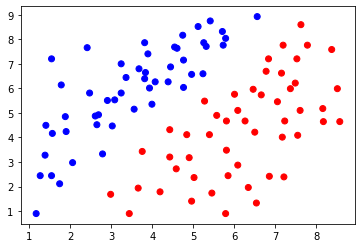

In [9]:
plt.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))

### 2) Welche besondere Eigenschaft besitzt der Datensatz wenn Sie sich den Scatterplot ansehen?

Der Datensatz ist linear separierbar

### 3) Implementieren Sie die Funktionen `perceptron_classify`, `perceptron_learn_step`, `perceptron_accuracy` und `perceptron_learn`

In [10]:
alpha = lambda x: 1 if x > 0 else 0

In [11]:
def perceptron_visualize(x1, x2, y, w):
    """
    scatter plot the data points and add a plot of the decision surface
    """
    plt.figure()
    plt.scatter(x1, x2, c=y, cmap=matplotlib.colors.ListedColormap(['red', 'blue']))
    plt.plot([x1.min(), x1.max()], [-(w[0] + w[1] * x1.min()) / w[2] , -(w[0] + w[1] * x1.max()) / w[2]])

In [12]:
def perceptron_classify(x1, x2, w):
    """
    classify a 2-d data point [x1,x2]^T via the weights w=[w0,w1,w2]^T
    """
    return alpha(np.dot([1, x1, x2], w))
    pass

In [13]:
def perceptron_learn_step(x1, x2, y, w):
    """
    perform a full perceptron learning step over all data points [x1_i,x2_i]^T 
    with labels y_i, update the weights w accordingly and return the new weights
    """
    _w = w.copy()
    for i in range(len(y)):
        x_i = np.array([1, x1[i], x2[i]])
        o = alpha(np.dot(x_i, w))
        _w = _w + (y[i] - o) * x_i
    return _w


In [14]:
def perceptron_accuracy(x1, x2, y, w):
    """
    compute the accuracy when applying the perceptron with weights w to all 
    data points [x1_i,x2_i]^T with labels y_i
    """ 
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y)):
        pred = perceptron_classify(x1[i], x2[i], w)
        if pred == 1 and y[i] == 1:
            tp += 1
        elif pred == 1 and y[i] == 0:
            fp += 1
        elif pred == 0 and y[i] == 1:
            fn += 1
        else:
            tn += 1
    return (tp + tn) / (tp + tn + fp + fn)

In [15]:
def perceptron_learn(x1, x2, y, gamma):
    """
    implementation of the perceptron learning algorithm on data points 
    [x1_i,x2_i]^T with labels y_i with accuracy threshold gamma and visualization
    every 10 iterations
    """
    w = np.array([0] * 3)
    iters = 0
    while perceptron_accuracy(x1, x2, y, w) < gamma:
        w = perceptron_learn_step(x1, x2, y, w)
        if iters % 25 == 0:
            perceptron_visualize(x1, x2, y, w)
        iters += 1
    return w, iters
        

### 4) Trainieren Sie das Perzeptron anhand des geladenen Datensatzes. Wie viele Iterationen wurden benötigt um eine 100%-ige Genauigkeit zu erreichen? Was sind die finalen Gewichte?

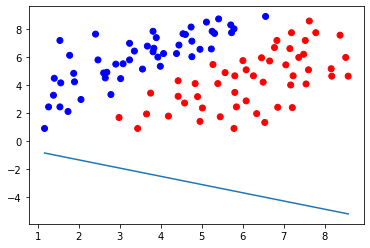

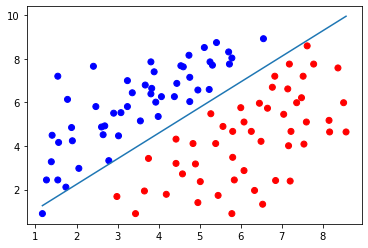

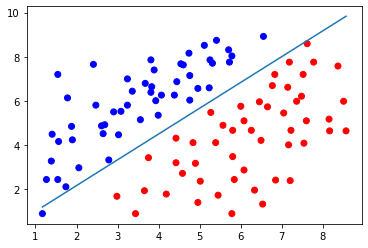

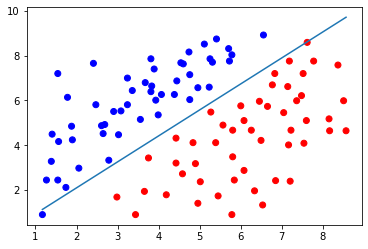

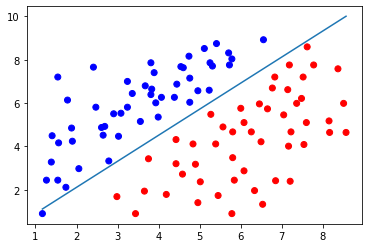

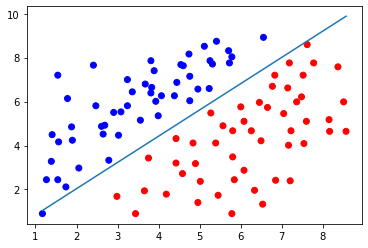

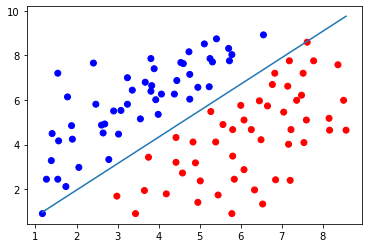

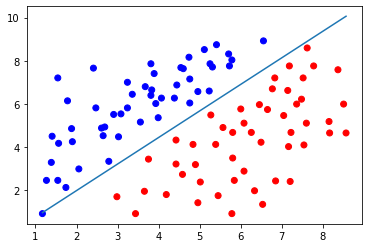

W: [ 175.     -417.1839  347.6963] 
Iterations: 181


In [16]:
w, iters = perceptron_learn(x1, x2, y, 1.0)
plt.show()
print("W:", w, "\nIterations:", iters)

## Aufgabe 4

### 1) Implementieren Sie den Adaline Klassifikations- und Lernalgorithmus

In [28]:
def sigma(x):
    if x > 0:
        return 1
    elif x == 0:
        return 0
    else:
        return -1

In [29]:
def adaline_classify(x1, x2, w):
    return sigma(np.dot([1, x1, x2], w))

In [30]:
def adaline_accuracy(x1, x2, y, w):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y)):
        pred = adaline_classify(x1[i], x2[i], w)
        if pred == 1 and y[i] == 1:
            tp += 1
        elif pred == 1 and y[i] == 0:
            fp += 1
        elif pred == 0 and y[i] == 1:
            fn += 1
        else:
            tn += 1
    return (tp + tn) / (tp + tn + fp + fn)

In [31]:
def adaline_learn_one_step(x1, x2, y, w, eta):
    _w = w.copy()
    for i in range(len(y)):
        x_i = np.array([1, x1[i], x2[i]])
        _w = _w + eta * (y[i] - np.dot(w, x_i)) * x_i
    return _w

In [32]:
def adaline_learn(x1, x2, y, eta, gamma):
    w = np.array([0] * 3)
    iters = 0
    while adaline_accuracy(x1, x2, y, w) < gamma:
        w = adaline_learn_one_step(x1, x2, y, w, eta)
        iters += 1
    return w, iters

### 2) Wenden Sie den Adaline Lernalgorithmus auf den Datensatz `linsep.csv` an. Wie viele Iterationen werden benötigt, um eine 100%-ige Genauigkeit zu erreichen? Was sind die finalen Gewichte?

In [33]:
w, iters = adaline_learn(x1, x2, y, 0.33, 1.0)
print("W:", w, "\nIterations:", iters)

W: [ -26500.38057305 -139051.51461863 -152120.4799862 ] 
Iterations: 2


### 3) Experimentieren Sie mit verschiedenen Werten für $\eta$. Was passiert und warum?

In [35]:
etas = np.arange(0.01, 0.2, 0.01)
for eta in etas:
    w, iters = adaline_learn(x1, x2, y, eta, 1.0)
    print("W:", w, "\nIterations:", iters)

W: [ -23.36490411 -124.28244816 -133.91224905] 
Iterations: 2
W: [ -95.45961643 -504.15238463 -547.56195221] 
Iterations: 2
W: [ -216.28413697 -1139.60980941 -1240.94910947] 
Iterations: 2
W: [ -385.83846572 -2030.65472251 -2214.07372084] 
Iterations: 2
W: [ -604.12260269 -3177.28712392 -3466.93578631] 
Iterations: 2
W: [ -871.13654787 -4579.50701364 -4999.53530589] 
Iterations: 2
W: [-1186.88030127 -6237.31439168 -6811.87227957] 
Iterations: 2
W: [-1551.35386288 -8150.70925803 -8903.94670736] 
Iterations: 2
W: [ -1964.55723271 -10319.69161269 -11275.75858925] 
Iterations: 2
W: [ -2426.49041075 -12744.26145567 -13927.30792525] 
Iterations: 2
W: [ -2937.15339701 -15424.41878696 -16858.59471536] 
Iterations: 2
W: [ -3496.54619148 -18360.16360656 -20069.61895956] 
Iterations: 2
W: [ -4104.66879416 -21551.49591448 -23560.38065788] 
Iterations: 2
W: [ -4761.52120507 -24998.41571071 -27330.8798103 ] 
Iterations: 2
W: [ -5467.10342418 -28700.92299525 -31381.11641682] 
Iterations: 2
W: [ -6221